In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [3]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense

In [4]:
model = Sequential()
model.add(Embedding(500, 16, input_length = 100))
model.add(LSTM(8))
model.add(Dense(1, activation = 'sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)

model.compile(optimizer = rmsprop, loss = 'binary_crossentropy',
              metrics = ['accuracy'])

checkpoint_cb = ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
earlystopping_cb = EarlyStopping(patience = 3, restore_best_weights = True)

history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 22ms/step - loss: 0.6928 - accuracy: 0.5279 - val_loss: 0.6920 - val_accuracy: 0.5892
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6908 - accuracy: 0.6127 - val_loss: 0.6890 - val_accuracy: 0.6372
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6844 - accuracy: 0.6599 - val_loss: 0.6761 - val_accuracy: 0.6990
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6406 - accuracy: 0.7103 - val_loss: 0.6087 - val_accuracy: 0.7010
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5947 - accuracy: 0.7171 - val_loss: 0.5858 - val_accuracy: 0.7240
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5729 - accuracy: 0.7337 - val_loss: 0.5696 - val_accuracy: 0.7288
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5524 - accuracy: 0.7509 - val_loss: 0.5489 - val_accuracy

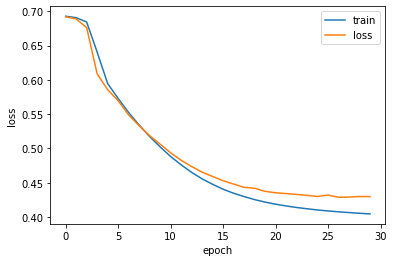

In [9]:
 import matplotlib.pyplot as plt
 
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.xlabel('epoch')
 plt.ylabel('loss')
 plt.legend(['train', 'loss'])
 plt.show()

In [10]:
model2 = Sequential()
model2.add(Embedding(500, 16, input_length = 100))
model2.add(LSTM(8, dropout = 0.3))
model2.add(Dense(1, activation = 'sigmoid'))

In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)

model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy',
              metrics = ['accuracy'])

checkpoint_cb = ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
earlystopping_cb = EarlyStopping(patience = 3, restore_best_weights = True)

history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 21ms/step - loss: 0.6925 - accuracy: 0.5473 - val_loss: 0.6918 - val_accuracy: 0.5916
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6904 - accuracy: 0.6042 - val_loss: 0.6888 - val_accuracy: 0.6292
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6846 - accuracy: 0.6443 - val_loss: 0.6795 - val_accuracy: 0.6672
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6561 - accuracy: 0.6744 - val_loss: 0.6252 - val_accuracy: 0.7028
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6019 - accuracy: 0.7246 - val_loss: 0.5953 - val_accuracy: 0.7276
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5807 - accuracy: 0.7383 - val_loss: 0.5740 - val_accuracy: 0.7388
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5632 - accuracy: 0.7487 - val_loss: 0.5596 - val_accuracy:

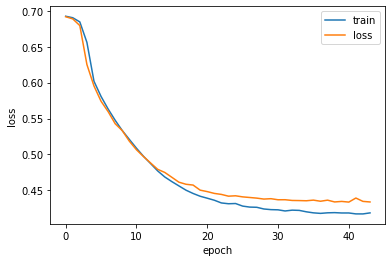

In [12]:
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.xlabel('epoch')
 plt.ylabel('loss')
 plt.legend(['train', 'loss'])
 plt.show()

In [13]:
model3 = Sequential()
model3.add(Embedding(500, 16, input_length = 100))
model3.add(LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(LSTM(8, dropout = 0.3))
model3.add(Dense(1, activation = 'sigmoid'))

In [14]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)

model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy',
              metrics = ['accuracy'])

checkpoint_cb = ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
earlystopping_cb = EarlyStopping(patience = 3, restore_best_weights = True)

history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 43ms/step - loss: 0.6928 - accuracy: 0.5183 - val_loss: 0.6924 - val_accuracy: 0.5538
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6909 - accuracy: 0.5760 - val_loss: 0.6883 - val_accuracy: 0.6436
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6723 - accuracy: 0.6492 - val_loss: 0.6370 - val_accuracy: 0.6824
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5966 - accuracy: 0.7043 - val_loss: 0.5751 - val_accuracy: 0.7166
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5562 - accuracy: 0.7338 - val_loss: 0.5419 - val_accuracy: 0.7422
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5308 - accuracy: 0.7501 - val_loss: 0.5239 - val_accuracy: 0.7506
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5116 - accuracy: 0.7603 - val_loss: 0.5038 - val_ac

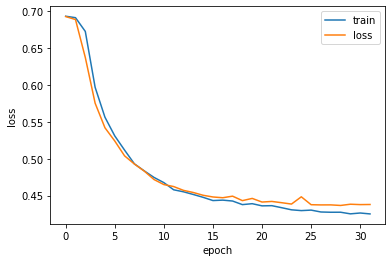

In [16]:
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.xlabel('epoch')
 plt.ylabel('loss')
 plt.legend(['train', 'loss'])
 plt.show()

In [17]:
from keras.layers import GRU

In [18]:
model4 = Sequential()
model4.add(Embedding(500, 16, input_length = 100))
model4.add(GRU(8))
model4.add(Dense(1, activation = 'sigmoid'))

In [19]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)

model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy',
              metrics = ['accuracy'])

checkpoint_cb = ModelCheckpoint('best-gru-model.h5', save_best_only=True)
earlystopping_cb = EarlyStopping(patience = 3, restore_best_weights = True)

history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 21ms/step - loss: 0.6922 - accuracy: 0.5257 - val_loss: 0.6909 - val_accuracy: 0.5428
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6890 - accuracy: 0.5732 - val_loss: 0.6875 - val_accuracy: 0.5830
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6844 - accuracy: 0.5997 - val_loss: 0.6820 - val_accuracy: 0.6046
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6769 - accuracy: 0.6213 - val_loss: 0.6732 - val_accuracy: 0.6176
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6648 - accuracy: 0.6371 - val_loss: 0.6592 - val_accuracy: 0.6342
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6444 - accuracy: 0.6594 - val_loss: 0.6346 - val_accuracy: 0.6624
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6079 - accuracy: 0.6894 - val_loss: 0.5856 - val_accuracy:

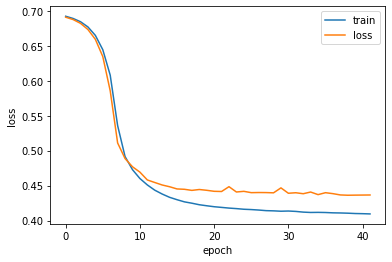

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'loss'])
plt.show()

In [23]:
test_seq = pad_sequences(test_input, maxlen = 100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 12s 15ms/step - loss: 0.4322 - accuracy: 0.7974


[0.432219535112381, 0.7973999977111816]